# Projekt A — Memory frontier (student edition)

To jest wersja “student edition”: mniej opcji, szybciej na CPU.

**Zasada:** nie zmieniasz kodu biblioteki. Zmieniasz tylko `CONFIG`:
- wybierasz swój przydział (model/hidden/seq_len),
- uruchamiasz runy,
- generujesz 1 wykres,
- dopisujesz 1 zdanie wniosku.

**Oddanie:**
- notebook,
- `outputs_*/...csv` i 1–2 wykresy `.png`,
- 1 zdanie wniosku poparte wykresem.


In [1]:
import os, sys
import matplotlib.pyplot as plt

# importuj bibliotekę rnnlab z katalogu nadrzędnego
sys.path.append(os.path.abspath(".."))

import torch
import pandas as pd
import rnnlab

# CPU-friendly: ogranicz liczbę wątków (laptopy)
rnnlab.cpu_friendly(4)

device = rnnlab.get_device("auto")
print("device:", device)


device: cpu


## CONFIG (zmień tutaj)

Wybierz *swój przydział*:
- `MODEL` (jedna architektura),
- `HIDDEN` (jedna wartość),
- `SEQ_LENS` (3–4 wartości),
- `SEEDS` (3 seedy).

To ma być wykonalne na CPU.


In [2]:
# ====== CONFIG ======
STUDENT_ID = "wbz"          # wpisz swój identyfikator (np. hash)
TASK_VARIANT = "distractors"
POOLING = "last"             # możesz spróbować "attn" jako bonus

MODEL = "gru"               # wybierz jedną: "rnn"/"gru"/"lstm"
HIDDEN = [20]                # wybierz jedną wartość
SEQ_LENS = [10, 15, 20, 25, 30]     # 3–4 wartości
SEEDS = [0, 1, 2]            # minimum 3

from rnnlab.train import TrainConfig
train_cfg = TrainConfig(
    steps=600,
    batch_size=64,
    lr=3e-3,
    optimizer="adam",
    grad_clip=1.0,
    eval_every=100,
    test_size=512,
    early_stop=True,
    early_stop_threshold=0.85,
    early_stop_patience=2,
    min_steps=200,
)

print("Runs:", rnnlab.count_runs(seq_lens=SEQ_LENS, hidden_sizes=[HIDDEN], models=[MODEL], seeds=SEEDS))
RUN_TAG = rnnlab.now_tag()
SEQ_TAG = f"seq{min(SEQ_LENS)}-{max(SEQ_LENS)}_n{len(SEQ_LENS)}"
SEED_TAG = f"seed{min(SEEDS)}-{max(SEEDS)}"
FILE_TAG = f"{STUDENT_ID}_{RUN_TAG}_{TASK_VARIANT}_{MODEL}_h{HIDDEN}_pool{POOLING}_{SEQ_TAG}_{SEED_TAG}"


Runs: 15


In [3]:
# ====== RUN ======
runs_df = rnnlab.sweep_frontier(
    task_variant=TASK_VARIANT,
    models=[MODEL],
    seq_lens=SEQ_LENS,
    hidden_sizes=HIDDEN,
    seeds=SEEDS,
    pooling=POOLING,
    device=device,
    train_cfg=train_cfg,
)
summary_df = rnnlab.summarize_frontier(runs_df)
display(summary_df)


,model,pooling,seq_len,hidden,P_success,mean_best_acc,std_best_acc,mean_steps
0,gru,last,10,20,1.000000,1.000000,0.000000,300.000000
1,gru,last,15,20,1.000000,1.000000,0.000000,300.000000
2,gru,last,20,20,1.000000,1.000000,0.000000,300.000000
3,gru,last,25,20,0.666667,0.840495,0.276271,466.666667
4,gru,last,30,20,0.000000,0.529948,0.011276,600.000000


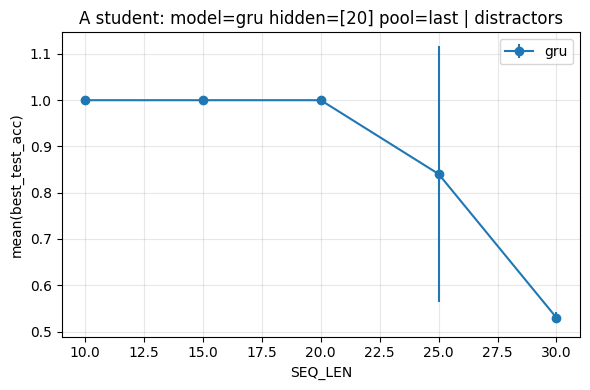

Saved to: outputs_studentA_wbz


<Figure size 640x480 with 0 Axes>

In [4]:
# ====== PLOT + SAVE ======
out_dir = f"outputs_studentA_{STUDENT_ID}"
os.makedirs(out_dir, exist_ok=True)

# linia mean(best_acc) vs SEQ_LEN (tu tylko jeden model)
rnnlab.plot_lines_acc(
    summary_df,
    title=f"A student: model={MODEL} hidden={HIDDEN} pool={POOLING} | {TASK_VARIANT}",
    out_path=os.path.join(out_dir, f"A_line_{MODEL}_h{HIDDEN}_pool{POOLING}.png"),
)

plt.show()
runs_df["student_id"] = STUDENT_ID
runs_df["file_tag"] = FILE_TAG

runs_df.to_csv(os.path.join(out_dir, f"A_runs_{FILE_TAG}.csv"), index=False)
summary_df.to_csv(os.path.join(out_dir, f"A_summary_{FILE_TAG}.csv"), index=False)
plt.savefig(os.path.join(out_dir, f"A_plot_{FILE_TAG}.png"), dpi=160)

#runs_df.to_csv(os.path.join(out_dir, f"A_runs_{MODEL}_h{HIDDEN}_pool{POOLING}.csv"), index=False)
#summary_df.to_csv(os.path.join(out_dir, f"A_summary_{MODEL}_h{HIDDEN}_pool{POOLING}.csv"), index=False)
print("Saved to:", out_dir)


## Wniosek (wypełnij)
- **Wniosek:** …
- **Dowód:** nazwa wykresu `.png` i co dokładnie widać
